![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Importación librerías
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

In [2]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


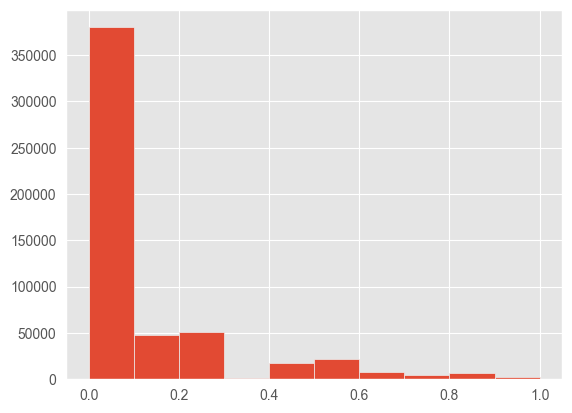

In [4]:
# Impresión histograma de variable de interés (y)
df.target.hist();

In [5]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [6]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text
X.head()

0    What are you talking about? What group do Pete...
1     NO!, Let him, we need a Conservative government.
2    Perhaps he took the "power out of the Cardinal...
3    As always, yours is dripping with sarcasm, whi...
4    The dirty little secret is that the price rang...
Name: comment_text, dtype: object

In [7]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

(362779,) (178683,) (362779,) (178683,)


## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [8]:
# Celda 1
# Inicializar CountVectorizer
count_vectorizer = CountVectorizer()

# Entrenar y transformar los datos de entrenamiento
X_train_unigrams = count_vectorizer.fit_transform(X_train)
print(f"Cantidad de unigramas: {X_train_unigrams.shape[1]:,.0f}")

# Transformar los datos de prueba
X_test_unigrams = count_vectorizer.transform(X_test)

# Inicializar y entrenar Ridge Regression
ridge_model = Ridge(alpha=17.0,random_state=17)
ridge_model.fit(X_train_unigrams, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = ridge_model.predict(X_test_unigrams)

# Calcular el error cuadrático medio (MSE)
mse_unigrams = mean_squared_error(y_test, y_pred)
print(f"El error cuadrático medio (MSE) usando un modelo Ridge y el método CountVectorizer-Unigramas es: {mse_unigrams:.5f}")

Cantidad de unigramas: 141,176
El error cuadrático medio (MSE) usando un modelo Ridge y el método CountVectorizer-Unigramas es: 0.02293


La tokenización usando CountVectorizer() generó **141,176** unigramas o tokens. Mediante un modelo de regresión Ridge, se obtuvo un MSE de aproximadamente **0.023**, indicando que el error en la predicción de la probabilidad de toxicidad es del orden de **0.151426**, lo que está por encima del promedio $(0.102991)$ de los valores de la variable dependiente en la base de datos. Esto significa que el modelo escogido no es el mejor para predecir en este caso; sin embargo, se continuó trabajando con él por su simplicidad, sus bajos requerimientos computacionales, y su reducido tiempo de ejecución facilitando la ejecución de este taller.

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [9]:
# Celda 2
# Inicializar CountVectorizer con trigramas
count_vectorizer_trigrams = CountVectorizer(ngram_range=(1, 3))  # Consideramos trigramas

# Entrenar y transformar los datos de entrenamiento
X_train_counts_trigrams = count_vectorizer_trigrams.fit_transform(X_train)
print(f"Cantidad de trigramas: {X_train_counts_trigrams.shape[1]:,.0f}")

# Transformar los datos de prueba
X_test_counts_trigrams = count_vectorizer_trigrams.transform(X_test)

# Inicializar y entrenar Ridge Regression
ridge_model_trigrams = Ridge(alpha=17.0, random_state=17)  # Puedes ajustar el parámetro alpha según sea necesario
ridge_model_trigrams.fit(X_train_counts_trigrams, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_trigrams = ridge_model_trigrams.predict(X_test_counts_trigrams)

# Calcular el error cuadrático medio (MSE)
mse_trigrams = mean_squared_error(y_test, y_pred_trigrams)
print(f"El error cuadrático medio (MSE) usando un modelo Ridge y el método CountVectorizer-Trigramas es: {mse_trigrams:.5f}")

Cantidad de trigramas: 14,221,994
El error cuadrático medio (MSE) usando un modelo Ridge y el método CountVectorizer-Trigramas es: 0.02521


La tokenización usando CountVectorizer(ngram_range=(1, 3)) generó **14,221,994** de trigramas o tokens; más de $100$ veces la cantidad de unigramas obtenidos en el punto anterior. Mediante el mismo modelo de regresión Ridge, se obtuvo un MSE de aproximadamente **0.02521**, indicando que el error en la predicción de la probabilidad de toxicidad es del orden de **0.158776**, ligeramente mayor que el modelo que se entrenó con unigramas.

El incremento en la métrica MSE puede deberse a que con el uso de trigramas aumenta la dimensionalidad del modelo de una manera considerable; al contar con la misma cantidad de observaciones, la maldición de la dimensionalidad ejerse su afecto, y el modelo pierde poder predictivo.

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

#Celda 3

$TF-IDF$ es una técnica de tokenización utilizada en el procesamiento de lenguaje natural (NLP) que se basa en la frecuencia de términos en una observación (frase, oración, mensaje, etc.) y en la frecuencia inversa de términos en toda la base de datos o documento (**TF-IDF, Term Frequency-Inverse Document Frequency**). 

TF (Frecuencia de término): Mide la frecuencia con la que aparece una palabra en un documento específico. Si una palabra aparece con frecuencia en un documento, es probable que sea importante para ese documento.

IDF (Frecuencia inversa de documento inversa): Mide la importancia de una palabra en todo el conjunto de documentos. Si una palabra es muy común en todo el conjunto, es menos discriminativa en la identificación del tema de un documento específico.

TF-IDF: Combina las dos medidas anteriores para evaluar la importancia de una palabra en un documento en relación con su importancia en el conjunto de datos. Una alta puntuación TF-IDF se da a palabras que aparecen a menudo en un documento específico, pero raramente en el corpus en su conjunto.

A continuación se muestra un ejemplo de cómo usar este método de tokenización en Python. Este código inicializa un tokenizador TfidfVectorizer, ajusta y transforma las observaciones en una matriz TF-IDF. Luego, extrae las características  utilizando get_feature_names_out() y convierte la matriz TF-IDF en un DataFrame de pandas para una fácil visualización y posterior uso en un algoritmo de predicción. La matriz resultante tfidf_df contendrá los valores TF-IDF para cada palabra en cada documento. Cada fila representa un documento u obervación y cada columna representa un token. Los valores en la matriz indican la importancia relativa de cada palabra en cada documento según TF-IDF.


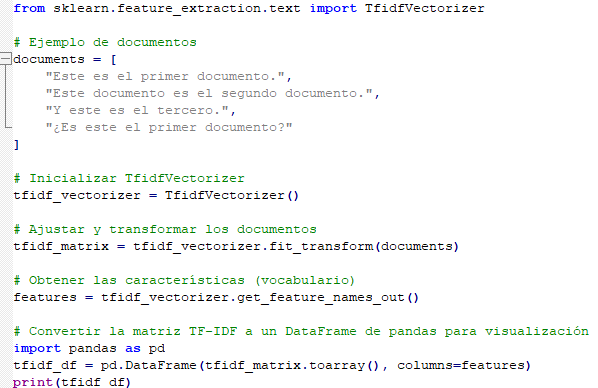


**TfidfVectorizer() en comparación con CountVectorizer():**

- Ventajas de TfidfVectorizer:
    - Ponderación de la importancia relativa: TfidfVectorizer utiliza la ponderación TF-IDF para evaluar la importancia relativa de las palabras en un documento en relación con su importancia en todo el conjunto de documentos. Esto permite capturar mejor la relevancia de las palabras para un documento específico.
    - Atenuación del efecto de las palabras comunes: TF-IDF atenúa el efecto de las palabras comunes que pueden no ser informativas en la identificación del tema de un documento. Esto ayuda a reducir el impacto de las palabras muy frecuentes que pueden no llevar mucha información discriminativa.
    - Manejo de términos raros: TF-IDF puede ser útil para manejar términos raros o específicos que pueden ser importantes para la clasificación de texto pero que aparecen con poca frecuencia en el conjunto de documentos. Estos términos raros tienden a recibir puntajes TF-IDF más altos en documentos donde aparecen.

- Desventajas de TfidfVectorizer:
    - Costo computacional: El cálculo de los valores TF-IDF puede ser más costoso computacionalmente en comparación con la simple cuenta de términos utilizada por CountVectorizer. Esto puede ser un problema en conjuntos de datos grandes o cuando se trabaja con recursos computacionales limitados.
    - Menos efectivo para datos pequeños: En conjuntos de datos pequeños, donde la frecuencia de términos simples es suficiente para capturar la importancia de las palabras, el uso de TF-IDF puede no ser necesario y puede incluso introducir ruido adicional en los datos.

- Ventajas de CountVectorizer:
    - Simplicidad y velocidad: CountVectorizer es más simple y rápido de calcular en comparación con TfidfVectorizer, ya que solo cuenta las ocurrencias de palabras en los documentos sin considerar su importancia relativa.
    - Efectividad en datos pequeños: Para conjuntos de datos pequeños donde la frecuencia de términos simples es suficiente para capturar la importancia de las palabras, CountVectorizer puede ser más efectivo y menos propenso a introducir ruido adicional en los datos.

- Desventajas de CountVectorizer:
    - No considera la importancia relativa: CountVectorizer no considera la importancia relativa de las palabras en un documento en relación con su importancia en todo el corpus, lo que puede llevar a una representación menos discriminativa de los documentos de texto. Esto puede ser un problema en conjuntos de datos grandes o en documentos largos donde las palabras muy frecuentes pueden no ser significativas.



## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [10]:
# Celda 4
# Inicializar y ajustar TfidfVectorizer en los datos de entrenamiento
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
print(f"Cantidad de unigramas: {X_train_tfidf.shape[1]:,.0f}")

# Transformar los datos de prueba
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Inicializar y entrenar el modelo de regresión Ridge
ridge_model_tfidf = Ridge(alpha=17.0,random_state=17)
ridge_model_tfidf.fit(X_train_tfidf, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_tfidf = ridge_model_tfidf.predict(X_test_tfidf)

# Calcular el error cuadrático medio (MSE)
mse_tfidf = mean_squared_error(y_test, y_pred_tfidf)
print(f"El error cuadrático medio (MSE) usando un modelo Ridge y el método TfidfVectorizer-Unigramas es: {mse_tfidf:.5f}")

#Se corre el modelo con trigramas con el método TfidfVectorizer para comparar resultados con el otro método de tokenización
tfidf_vectorizer3 = TfidfVectorizer(ngram_range=(1, 3))
X_train_tfidf3 = tfidf_vectorizer3.fit_transform(X_train)
print(f"Cantidad de trigramas: {X_train_tfidf3.shape[1]:,.0f}")

X_test_tfidf3 = tfidf_vectorizer3.transform(X_test)

ridge_model_tfidf3 = Ridge(alpha=17.0,random_state=17)
ridge_model_tfidf3.fit(X_train_tfidf3, y_train)

y_pred_tfidf3 = ridge_model_tfidf3.predict(X_test_tfidf3)

mse_tfidf3 = mean_squared_error(y_test, y_pred_tfidf3)
print(f"El error cuadrático medio (MSE) usando un modelo Ridge y el método TfidfVectorizer-Trigramas es: {mse_tfidf3:.5f}")


Cantidad de unigramas: 141,176
El error cuadrático medio (MSE) usando un modelo Ridge y el método TfidfVectorizer-Unigramas es: 0.01983
Cantidad de trigramas: 14,221,994
El error cuadrático medio (MSE) usando un modelo Ridge y el método TfidfVectorizer-Trigramas es: 0.02495


La tokenización usando el método TfidfVectorizer() generó **141,176** unigramas o tokens; tal como se esperaba, ya que se mantuvo al unidad para el token: unigrama. Mediante el mismo modelo de regresión Ridge, se obtuvo un MSE de aproximadamente **0.01983**, indicando que el error en la predicción de la probabilidad de toxicidad es del orden de **0.140819**, menor que el modelo que se entrenó con unigramas obtenidos por el método de CountVectorizer().

El mejoramiento en el poder de predicción del modelo radica en el método de tokenización. Con se explica ene el punto anterior, TfidfVectorizer() asigna un nivel de importancia relativa al token basado en la frecuencia en la que aparece en la observación y en la frecuencia inversa en la que aparece en la base de datos, aumentando la correlación entre la probabilidad de toxicidad y el token.

Al llamativo es que el uso de este método de tokenización, comparado con el primero, reduce considerablemente los tiempos de ejecución del ajuste y transformarción, y también del entrenamiento del modelo.

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

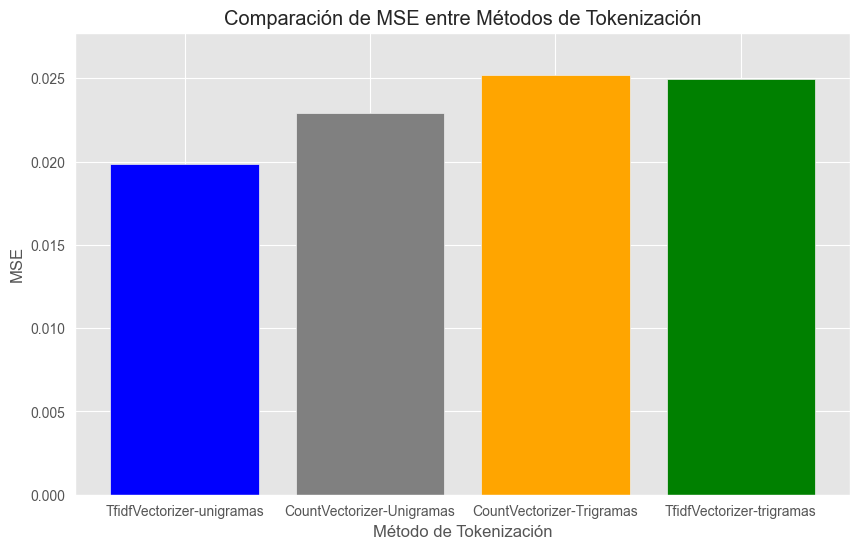

In [13]:
# Celda 5
# Se crea una gráfica de barras para comparar los MSEs de los diferentes métodos de tokenización  
model_names = ["TfidfVectorizer-unigramas","CountVectorizer-Unigramas","CountVectorizer-Trigramas","TfidfVectorizer-trigramas" ]

mse_values = [mse_tfidf, mse_unigrams, mse_trigrams, mse_tfidf3]

plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color=['blue', 'gray','orange', 'green'])

plt.xlabel('Método de Tokenización')
plt.ylabel('MSE')
plt.title('Comparación de MSE entre Métodos de Tokenización')
plt.ylim(0, max(mse_values) * 1.1);

Después de comparar y analizar los resultados de los cuatro modelos utilizando diferentes métodos de tokenización y enfoques en el preprocesamiento de texto, tenemos las siguientes conclusiones:

- **CountVectorizer (unigramas):**
Este enfoque, que considera cada palabra individual (unigrama) como un token, produce un número de tokens que pueden estar en un rango aceptable para el entrenamiento de modelos de regresión; sin embargo, este método de tokenización no propociona una correlación significativa con la variable independiente al tener en cuenta la importancia relativa de las palabras. Esta condición no le otorga poder de predicción al modelo (MSE: 0.02293).

- **CountVectorizer (trigramas):**
Al considerar trigramas (secuencias de tres palabras consecutivas) como tokens, este enfoque incrementa significativamente el número de tokens o variables indenpendientes, afectado el desempeño del modelo de predicción debido al efecto de la $Maldición de la Dimensionalidad$. Asimismo, incrementa notablemente el tiempo de ejecución del ajuste y transformación de la base de datos y de entrenamiento del modelo. Estas condiciones afectan negativamente el desempeño del modelo. En este caso, este enfoque tiene el MSE más alto. (MSE: 0.02521)

- **TfidfVectorizer (unigramas y trigramas):**
Este enfoque, que utiliza la ponderación TF-IDF para evaluar la importancia relativa de las palabras, aumentó el poder predictivo del modelo obteniendo el MSE más bajo entre los modelos evaluados, al aumentar la correlación entre los tokens (variables independientes) y la variable dependiente. Este método de preprocesamiento, tiene una ventaja adicional; su ajuste y transformación es más eficiente, permitiendo tiempos de ejecución mucho más cortos en el pre-procesamiento del texto y además, en el entrenamiento de modelos de predicción. (MSE: 0.01983)

En conclusión, la selección de un método apropiado de tokenización durante la fase de preprocesammiento de texto infiere directamente en el desempeño del modelo de predicción que sse estime usar para cada caso particular.